In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Описание вариантов опыта: стандартный субстрат + 1л торфа, 2л торфа, 4л торфа, 8л торфа. В качествепосадочного материала были использованы микрорастения мини-клубни. Результаты первично обработаны.
     
Следующая схема:
- датчики № 1,2,3,4 - это данные с опыта на микрорастениях, соответственно 1л торфа, 2л торфа, 4л торфа, 8л торфа.
- датчики № 8,7,6,5 - это данные с опыта на мини-клубнях, соответственно 1л торфа, 2л торфа, 4л торфа, 8л торфа.

В данном случае интересны именно микроклубни.

In [2]:
soil1 = pd.read_excel("../data/Данные_влажность_опыт_с_разным_субстратом.xlsx", '09-10', parse_dates=["Время"])
soil2 = pd.read_excel("../data/Данные_влажность_опыт_с_разным_субстратом.xlsx", '11-01', parse_dates=["Время"])

soil2.index = pd.RangeIndex(start=soil1.shape[0], stop=soil1.shape[0]+soil2.shape[0], name='index')
soil_full = pd.concat([soil1, soil2])
soil_full = soil_full.rename(columns={"Д8": "1л", "Д7": "2л", "Д6": "4л", "Д5": "8л"})
soil_full = soil_full[['Секция', 'Время', '1л', '2л', '4л', '8л']]
soil_full

,Секция,Время,1л,2л,4л,8л
0,0,2021-09-20 00:00:08,0,2,0,0
1,1,2021-09-20 00:00:09,0,3,0,0
2,2,2021-09-20 00:00:09,0,0,0,0
3,3,2021-09-20 00:00:10,0,0,1,1
4,4,2021-09-20 00:00:11,0,1,0,0
...,...,...,...,...,...,...
1277366,0,2021-12-09 20:06:57,0,0,0,0
1277367,1,2021-12-09 20:06:58,0,0,0,0
1277368,2,2021-12-09 20:06:58,0,0,0,0
1277369,3,2021-12-09 20:06:59,0,1,0,0


In [3]:
def draw_graphics(num):
    fig = plt.figure(figsize=(13, 4))
    fig.suptitle(f'Секция {num}')

    сolumns_name = ['1л', '2л', '4л', '8л']

    for i, v in enumerate(сolumns_name):
        plt.subplot(2, 2, i+1).set_title(v)
        plt.tight_layout()
        plt.plot(soil_full[soil_full['Секция'] == num]['Время'], soil_full[soil_full['Секция'] == num][v])
        fig.tight_layout()
    plt.show()

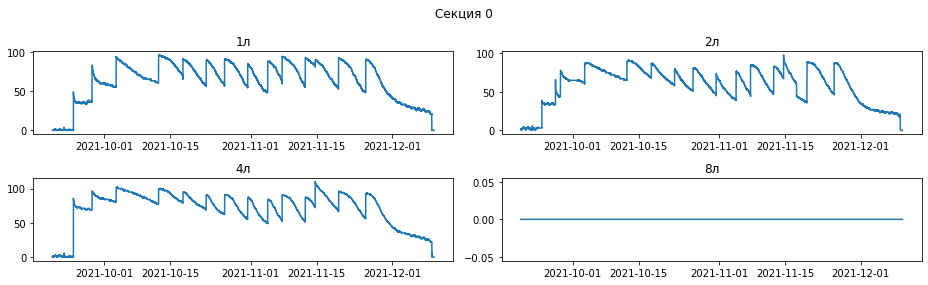

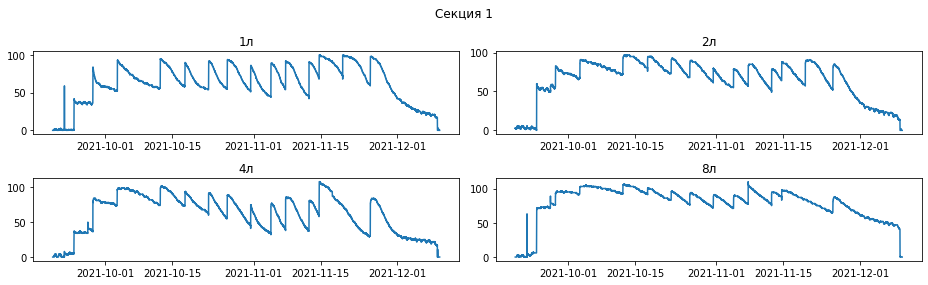

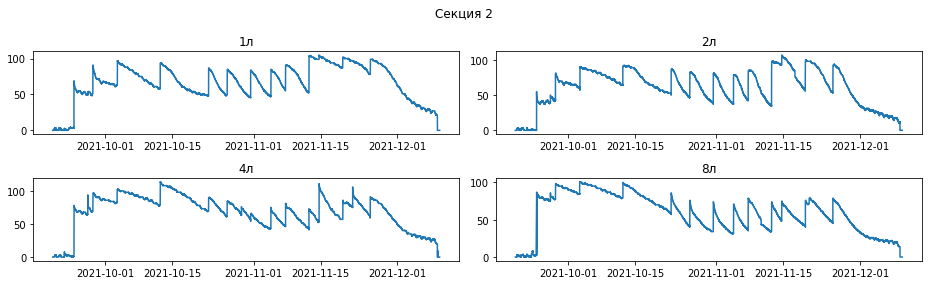

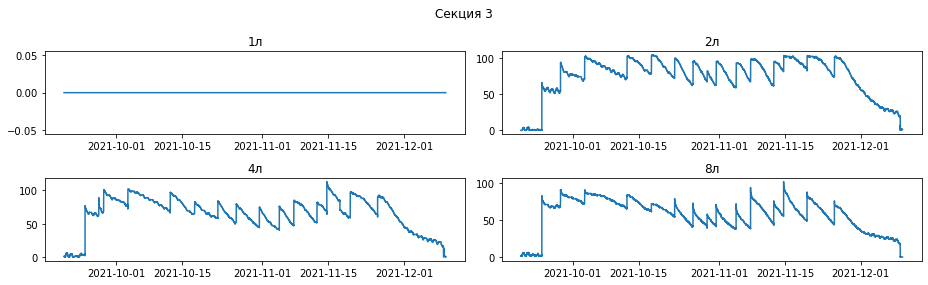

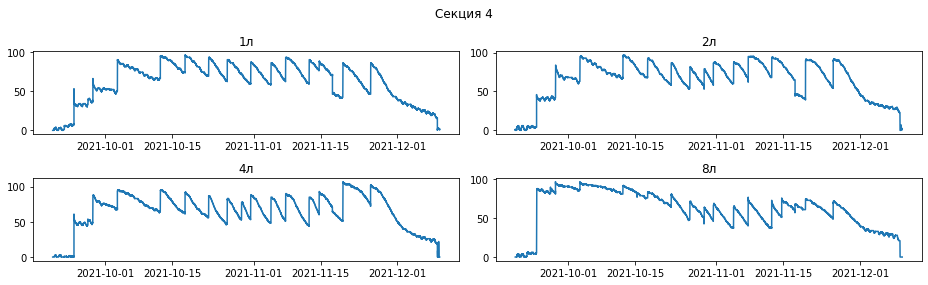

In [4]:
for i in range(5):
    draw_graphics(i)

In [5]:
def draw_graphics_based_on_section(num):
    fig = plt.figure(figsize=(10, 4))
    fig.suptitle(f'Секция {num}')

    сolumns_name = ['1л', '2л', '4л', '8л']

    for i, v in enumerate(сolumns_name):
        plt.plot(soil_full[soil_full['Секция'] == num]['Время'], soil_full[soil_full['Секция'] == num][v])
    plt.legend(['1л', '2л', '4л', '8л'])

    plt.show()

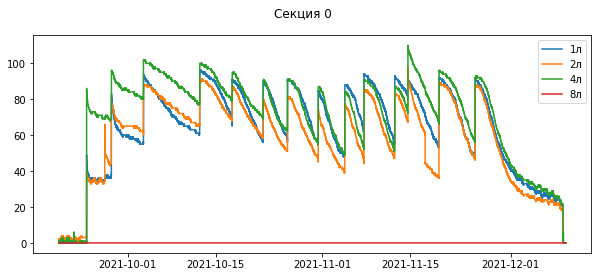

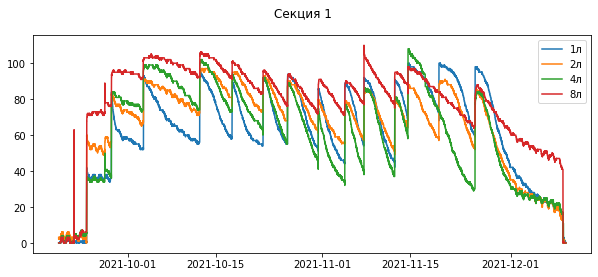

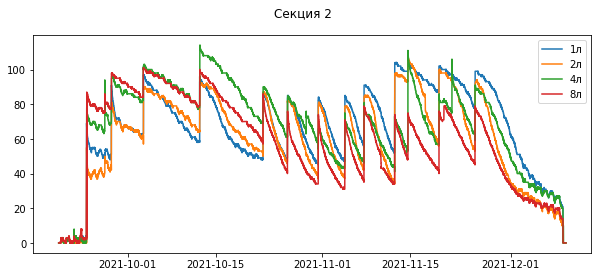

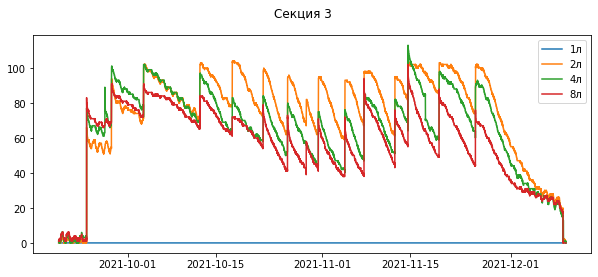

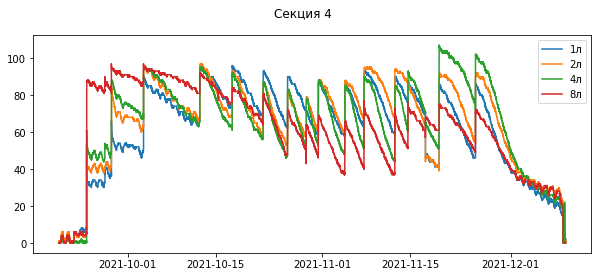

In [6]:
for i in range(5):
    draw_graphics_based_on_section(i)

In [7]:
def draw_graphics_based_on_peat(type):
    fig = plt.figure(figsize=(10, 4))
    fig.suptitle(f'Торф {type}')

    for i in range(5):
        plt.plot(soil_full[soil_full['Секция'] == i]['Время'], soil_full[soil_full['Секция'] == i][type])
    plt.legend(['Cекция 0', 'Cекция 1', 'Cекция 2', 'Cекция 3', 'Cекция 4'])

    plt.show()

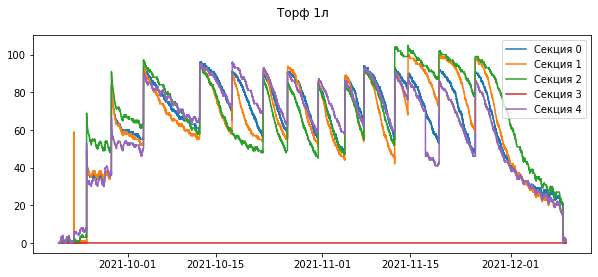

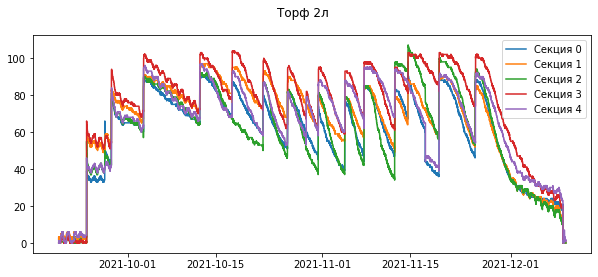

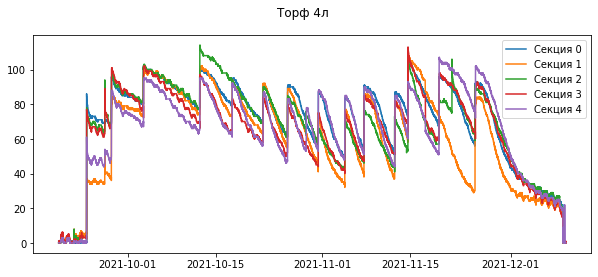

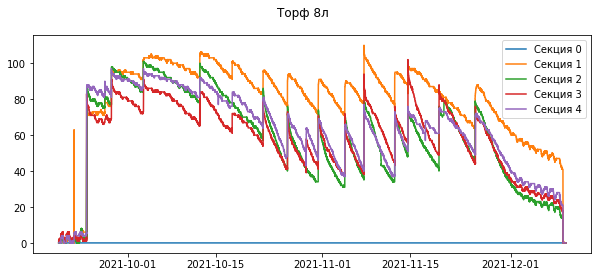

In [8]:
for i in ['1л', '2л', '4л', '8л']:
    draw_graphics_based_on_peat(i)

#### Выводы: 
- _на секции 0_: отсутствуют данные по субстрату 8л торфа    
- _на секции 3_: отсутствуют данные по субстрату 1л торфа      
- поливы происходили примерно в одно и то же время на всех секция со всеми видами субстрата

#### Приведение к единому временному промежутку

In [9]:
soil_full = soil_full[soil_full["Время"] <= pd.Timestamp(2021,12,3,17,45,0)]
soil_full = soil_full.reset_index(drop=True)
soil_full.tail()

,Секция,Время,1л,2л,4л,8л
1179993,0,2021-12-03 17:44:57,33,26,35,0
1179994,1,2021-12-03 17:44:58,31,28,26,56
1179995,2,2021-12-03 17:44:59,42,28,35,26
1179996,3,2021-12-03 17:44:59,0,40,33,30
1179997,4,2021-12-03 17:45:00,33,36,35,34


#### Преобразование даты и времени в формат время (час)

In [10]:
day = 20
count = 0
soil_full["Время (час)"] = soil_full["Время"].apply(lambda x: (x.hour * 60**2 + x.minute * 60 + x.second)/3600)
for index, row in soil_full.iterrows():
    if row["Время"].day != day:
        day = row["Время"].day
        count += 1
    soil_full.loc[index, "Время (час)"] = count * 24 + soil_full["Время (час)"][index]

In [11]:
soil_full

,Секция,Время,1л,2л,4л,8л,Время (час)
0,0,2021-09-20 00:00:08,0,2,0,0,0.002222
1,1,2021-09-20 00:00:09,0,3,0,0,0.002500
2,2,2021-09-20 00:00:09,0,0,0,0,0.002500
3,3,2021-09-20 00:00:10,0,0,1,1,0.002778
4,4,2021-09-20 00:00:11,0,1,0,0,0.003056
...,...,...,...,...,...,...,...
1179993,0,2021-12-03 17:44:57,33,26,35,0,1793.749167
1179994,1,2021-12-03 17:44:58,31,28,26,56,1793.749444
1179995,2,2021-12-03 17:44:59,42,28,35,26,1793.749722
1179996,3,2021-12-03 17:44:59,0,40,33,30,1793.749722


#### Разделение на типы субстрата и удаление секций с отсутствующими значениями

In [12]:
# 1 литр
liter_1 = soil_full[['Секция','Время (час)','1л']]
liter_1 = liter_1[liter_1['Секция'] != 3]
liter_1 = liter_1.reset_index(drop=True)
liter_1.head(7)

,Секция,Время (час),1л
0,0,0.002222,0
1,1,0.002500,0
2,2,0.002500,0
3,4,0.003056,0
4,0,0.010556,0
5,1,0.010833,0
6,2,0.011111,0


In [13]:
# 2 и 4 литра
liter_2 = soil_full[['Секция','Время (час)','2л']]
liter_2 = liter_2.reset_index(drop=True)
liter_4 = soil_full[['Секция','Время (час)','4л']]
liter_4 = liter_4.reset_index(drop=True)

In [14]:
# 8 литров
liter_8 = soil_full[['Секция','Время (час)','8л']]
liter_8 = liter_8[liter_8['Секция'] != 0]
liter_8 = liter_8.reset_index(drop=True)
liter_8.head(7)

,Секция,Время (час),8л
0,1,0.002500,0
1,2,0.002500,0
2,3,0.002778,1
3,4,0.003056,0
4,1,0.010833,0
5,2,0.011111,0
6,3,0.011389,1


#### Нахождение средних значений

In [15]:
# некоторые данные отсутствуют
# например, liter_1[1711:1715] - отсутствуют данные с первой секции
# liter_1[3241:3245] - отсутсвуют данные с нулевой секции
liter_1['Секция'].value_counts()

4    236662
2    236482
1    236418
0    233815
Name: Секция, dtype: int64

In [16]:
pd.options.mode.chained_assignment = None 

def averaging(liter):
    liter['отсчет'] = 0
    count = 0
    for index, row in liter[1:].iterrows():
        if (liter[index-1:index]['Секция'].values[0] > row['Секция']):
            count += 1
        liter['отсчет'][index] = count
    return liter

In [17]:
liter_1 = averaging(liter_1)

In [18]:
liter_2 = averaging(liter_2)

In [19]:
liter_4 = averaging(liter_4)

In [20]:
liter_8 = averaging(liter_8)

In [21]:
liter_1_res = liter_1[['Время (час)', '1л', 'отсчет']].groupby(['отсчет']).mean()
liter_2_res = liter_2[['Время (час)', '2л', 'отсчет']].groupby(['отсчет']).mean()
liter_4_res = liter_4[['Время (час)', '4л', 'отсчет']].groupby(['отсчет']).mean()
liter_8_res = liter_8[['Время (час)', '8л', 'отсчет']].groupby(['отсчет']).mean()

In [23]:
_ = liter_1_res.to_csv('../result/liter_1.csv', index=False)
_ = liter_2_res.to_csv('../result/liter_2.csv', index=False)
_ = liter_4_res.to_csv('../result/liter_4.csv', index=False)
_ = liter_8_res.to_csv('../result/liter_8.csv', index=False)

Вывод средних значений по каждому из типов субстрата

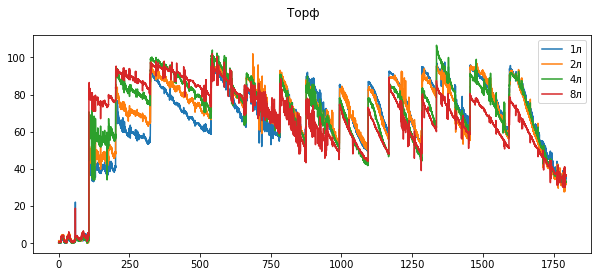

In [24]:
fig = plt.figure(figsize=(10, 4))
fig.suptitle(f'Торф')

legend = ['1л', '2л', '4л', '8л']

for i, liter in enumerate([liter_1_res, liter_2_res, liter_4_res, liter_8_res]):
    plt.plot(liter['Время (час)'], liter[legend[i]])
plt.legend(legend)

plt.show()